In [33]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, joblib


#some nlp lib
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [34]:
#reading the data from the file
x,y =[],[]

#using file handling to read the file
with open("/content/SMSSpamCollection.txt","r")as file:

#reading the file line by line
  data= file.read()

#iterate through each line
  for data_item in data.split("\n"):

#checks if the line contains exactly two elements when splitted by tab character
    if len(data_item.split("\t"))==2:

#append the first element to x and the second element to y
      x.append(data_item.split("\t")[1])
      y.append(data_item.split("\t")[0])

print("Successfully read the data")

Successfully read the data


In [35]:
len(x),len(y)

(5574, 5574)

In [36]:

#dataframe
data_dict ={"mail_message":x, "label":y}
df=pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [38]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=False)

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [39]:

#
df["Label"]=df["label"].map({"ham":0,"spam":1})
df.head()

,mail_message,label,Label
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


In [40]:
import re
##function to clean and lowercase text
def clean_text(text):
    text = re.sub('[^a-zA-Z]',' ',str(text)) # Convert to string before applying regex
    text = text.lower()
    return text # Return the cleaned text
df['mail_message'] = df['mail_message'].astype(str).apply(clean_text) # Ensure the column is string type before applying the function
df.head()

,mail_message,label,Label
0,go until jurong point crazy available only ...,ham,0
1,ok lar joking wif u oni,ham,0
2,free entry in a wkly comp to win fa cup fina...,spam,1
3,u dun say so early hor u c already then say,ham,0
4,nah i don t think he goes to usf he lives aro...,ham,0


In [41]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

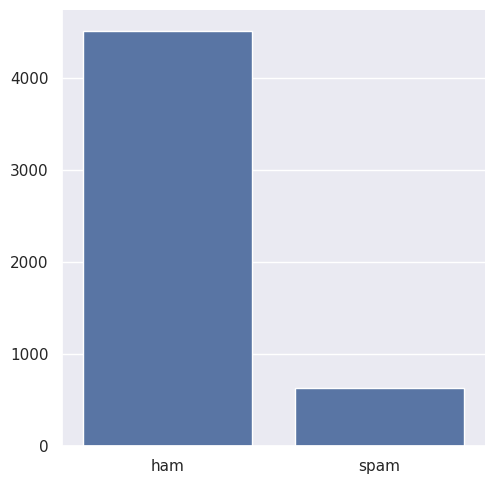

In [42]:

classes=list(df["label"].value_counts().index)
valu =list(df["label"].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=valu,kind="bar")
plt.show()

In [43]:
df["label"].value_counts()

,count
label,
ham,4515
spam,633


In [44]:

df.sample()

,mail_message,label,Label
49,u don t know how stubborn i am i didn t even ...,ham,0


In [45]:
ham=df[df["label"]=="ham"].sample()
spam=df[df["label"]=="spam"]
df=pd.concat([ham,spam])
df["label"].value_counts()

,count
label,
spam,633
ham,1


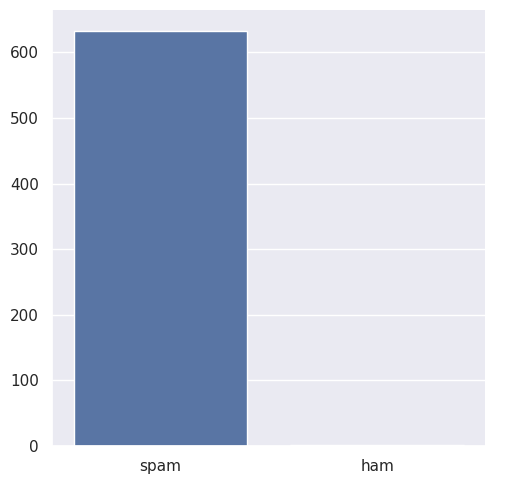

In [46]:
classes=list(df["label"].value_counts().index)
valu =list(df["label"].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=valu,kind="bar")
plt.show()

In [47]:
df["label"]=df["label"].map({"ham":0,"spam":1})

df.head()

,mail_message,label,Label
2932,hi test on lt gt rd,0,0
2,free entry in a wkly comp to win fa cup fina...,1,1
5,freemsg hey there darling it s been week s n...,1,1
8,winner as a valued network customer you have...,1,1
9,had your mobile months or more u r entitle...,1,1


In [48]:

x=df["mail_message"]
y=df["label"]

In [49]:
BOW_obj = CountVectorizer(
    max_features=2000,
    stop_words="english"
)
x_transformed = BOW_obj.fit_transform(x)
x_transformed.shape

(634, 1912)

In [50]:
dense_matrix=x_transformed.toarray()
dense_matrix.shape

(634, 1912)

In [51]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(dense_matrix,y,test_size=0.2)

In [52]:
# using multinomial naive bayes
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [53]:
model.score(x_test,y_test)

0.9921259842519685

In [54]:
pred=model.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])